<a href="https://colab.research.google.com/github/Bindhubhavanan/CodeTech_IT_Solutions_Artificial_Intelligence/blob/main/Task_4_Computer_Vision_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

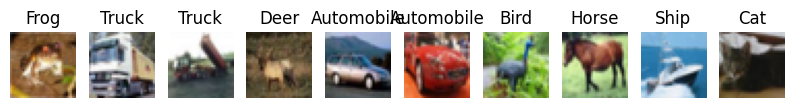

In [ ]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[np.argmax(y_train[i])])
    plt.axis('off')
plt.show()

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 87ms/step - accuracy: 0.3247 - loss: 1.8425 - val_accuracy: 0.4860 - val_loss: 1.4179
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 90ms/step - accuracy: 0.5258 - loss: 1.3224 - val_accuracy: 0.5594 - val_loss: 1.2503
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 87ms/step - accuracy: 0.5859 - loss: 1.1710 - val_accuracy: 0.6104 - val_loss: 1.1071
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 91ms/step - accuracy: 0.6284 - loss: 1.0471 - val_accuracy: 0.6194 - val_loss: 1.0737
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 86ms/step - accuracy: 0.6604 - loss: 0.9706 - val_accuracy: 0.6556 - val_loss: 1.0002
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.6844 - loss: 0.8949 - val_accuracy: 0.6745 - val_loss: 0.9334
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 85ms/step - accuracy: 0.7029 - loss: 0.8456 - val_accuracy: 0.6725 - val_loss: 0.9292
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 86ms/step - accuracy: 0.7204 - loss: 0.7914 - 

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")

313/313 - 4s - 14ms/step - accuracy: 0.6825 - loss: 0.9536
Test accuracy: 0.68


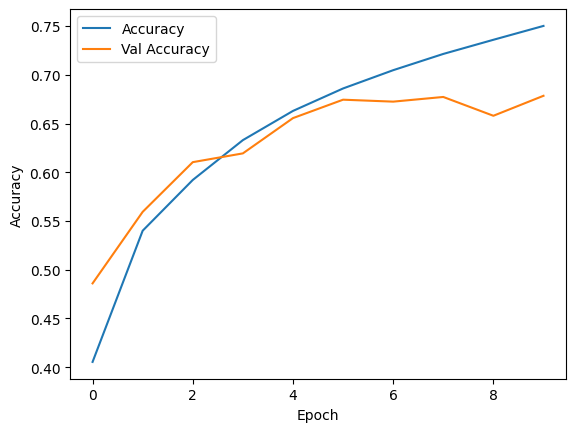

In [ ]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.save("cifar10_model.h5")
print("Model saved as cifar10_model.h5")

Model saved as cifar10_model.h5
